# Data Visualiation, Imputation & Feature Selection Assignment
## Kayleigh James
### IE7860 Winter 2020

**Data Set Source:** 
https://archive.ics.uci.edu/ml/datasets/Parkinsons

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk). 

Further details are contained in the following reference -- if you use this dataset, please cite: 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

Attribute Information:

Matrix column entries (attributes): 
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

First, let's import the dataset and load it in as a pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Now that we've loaded in the dataset correctly, we can get summary statistics of each column.

In [2]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Now, let's drop the name column as we don't need it for building a model.  We will also drop any rows with null values or any rows that are duplicates.  We will then print out the size of the dataset so we can see how many features and observations we have.

In [3]:
df = df.drop(columns = ['name'])
df = df.dropna()
df = df.drop_duplicates()
df.shape

(195, 23)

We can see that there are 195 rows after datacleaning and that there are 23 features.  This is a relatively sparse dataset and thus it is a good idea to do some feature selection as it will likely yield better results when we do build a classification model to predict whether or not the patient has Parkinson's.  Now we will take our target variable (status which is the diagnosis) and load it into a dataframe called y that will contain our class labels.  We will then drop that column from the original dataframe and load the remaining columns into a dataframe called x that will contain all of our features.

In [4]:
y = df['status']
x = df.drop(columns = ['status'])

Now that we have created two separate dataframes we can start doing some high dimensional visualizations.  We will first create a heatmap in order to see all of the correlations between each of the variables.

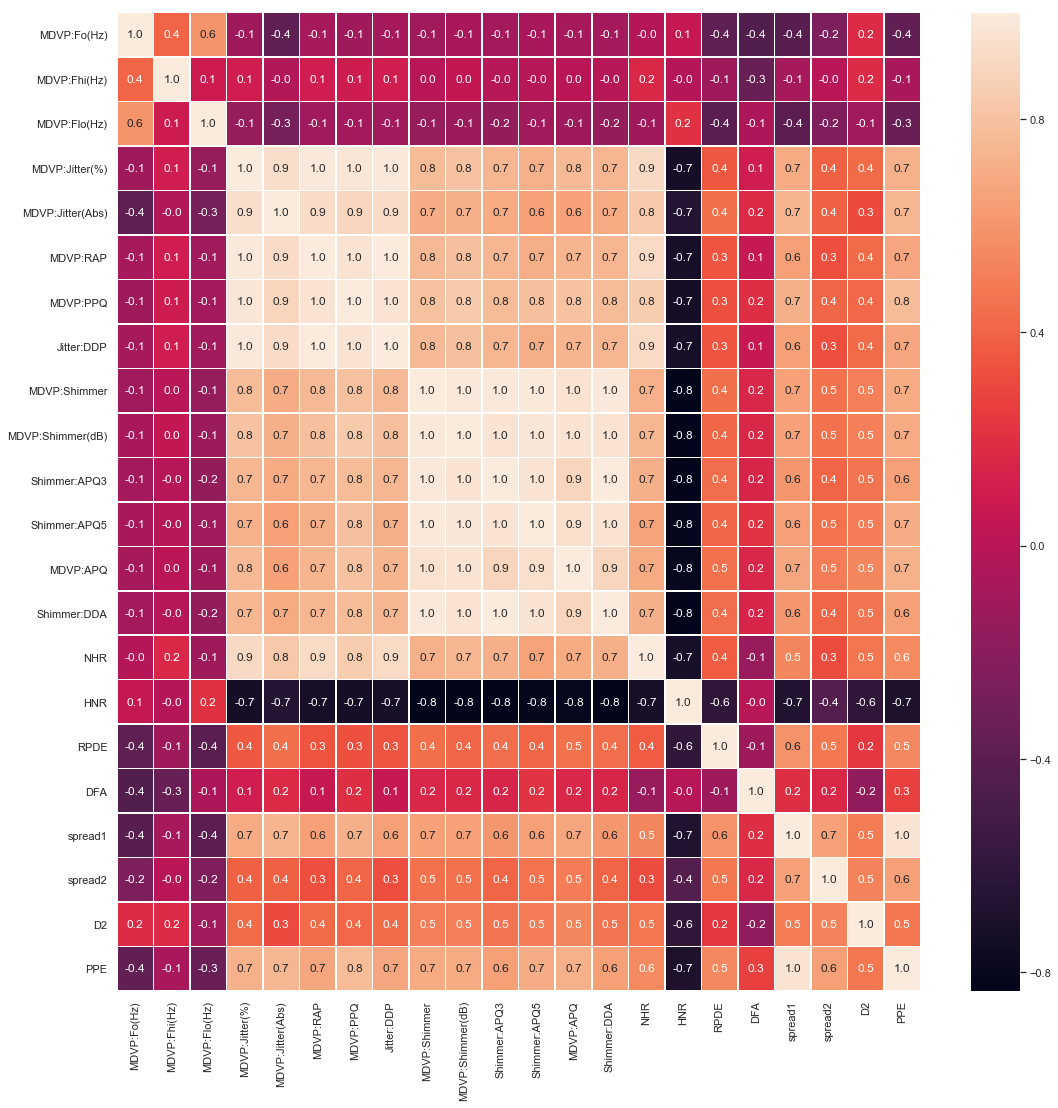

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Even off of the main diagonal (where the correlation is exactly one as that is where we are showing the correlation between two variables) we can see that many of the variables are highly correlated (e.g. Jitter:DDP and NHR have a correlation of 0.9).  This suggests that there may be some redundancy in the dataset.  However, this just shows a **linear** correlation; these variables may not be non-linearly correlated so they may all still be important.  Another way we can demonstrate similar information is a pairwise plot which can be seen below.

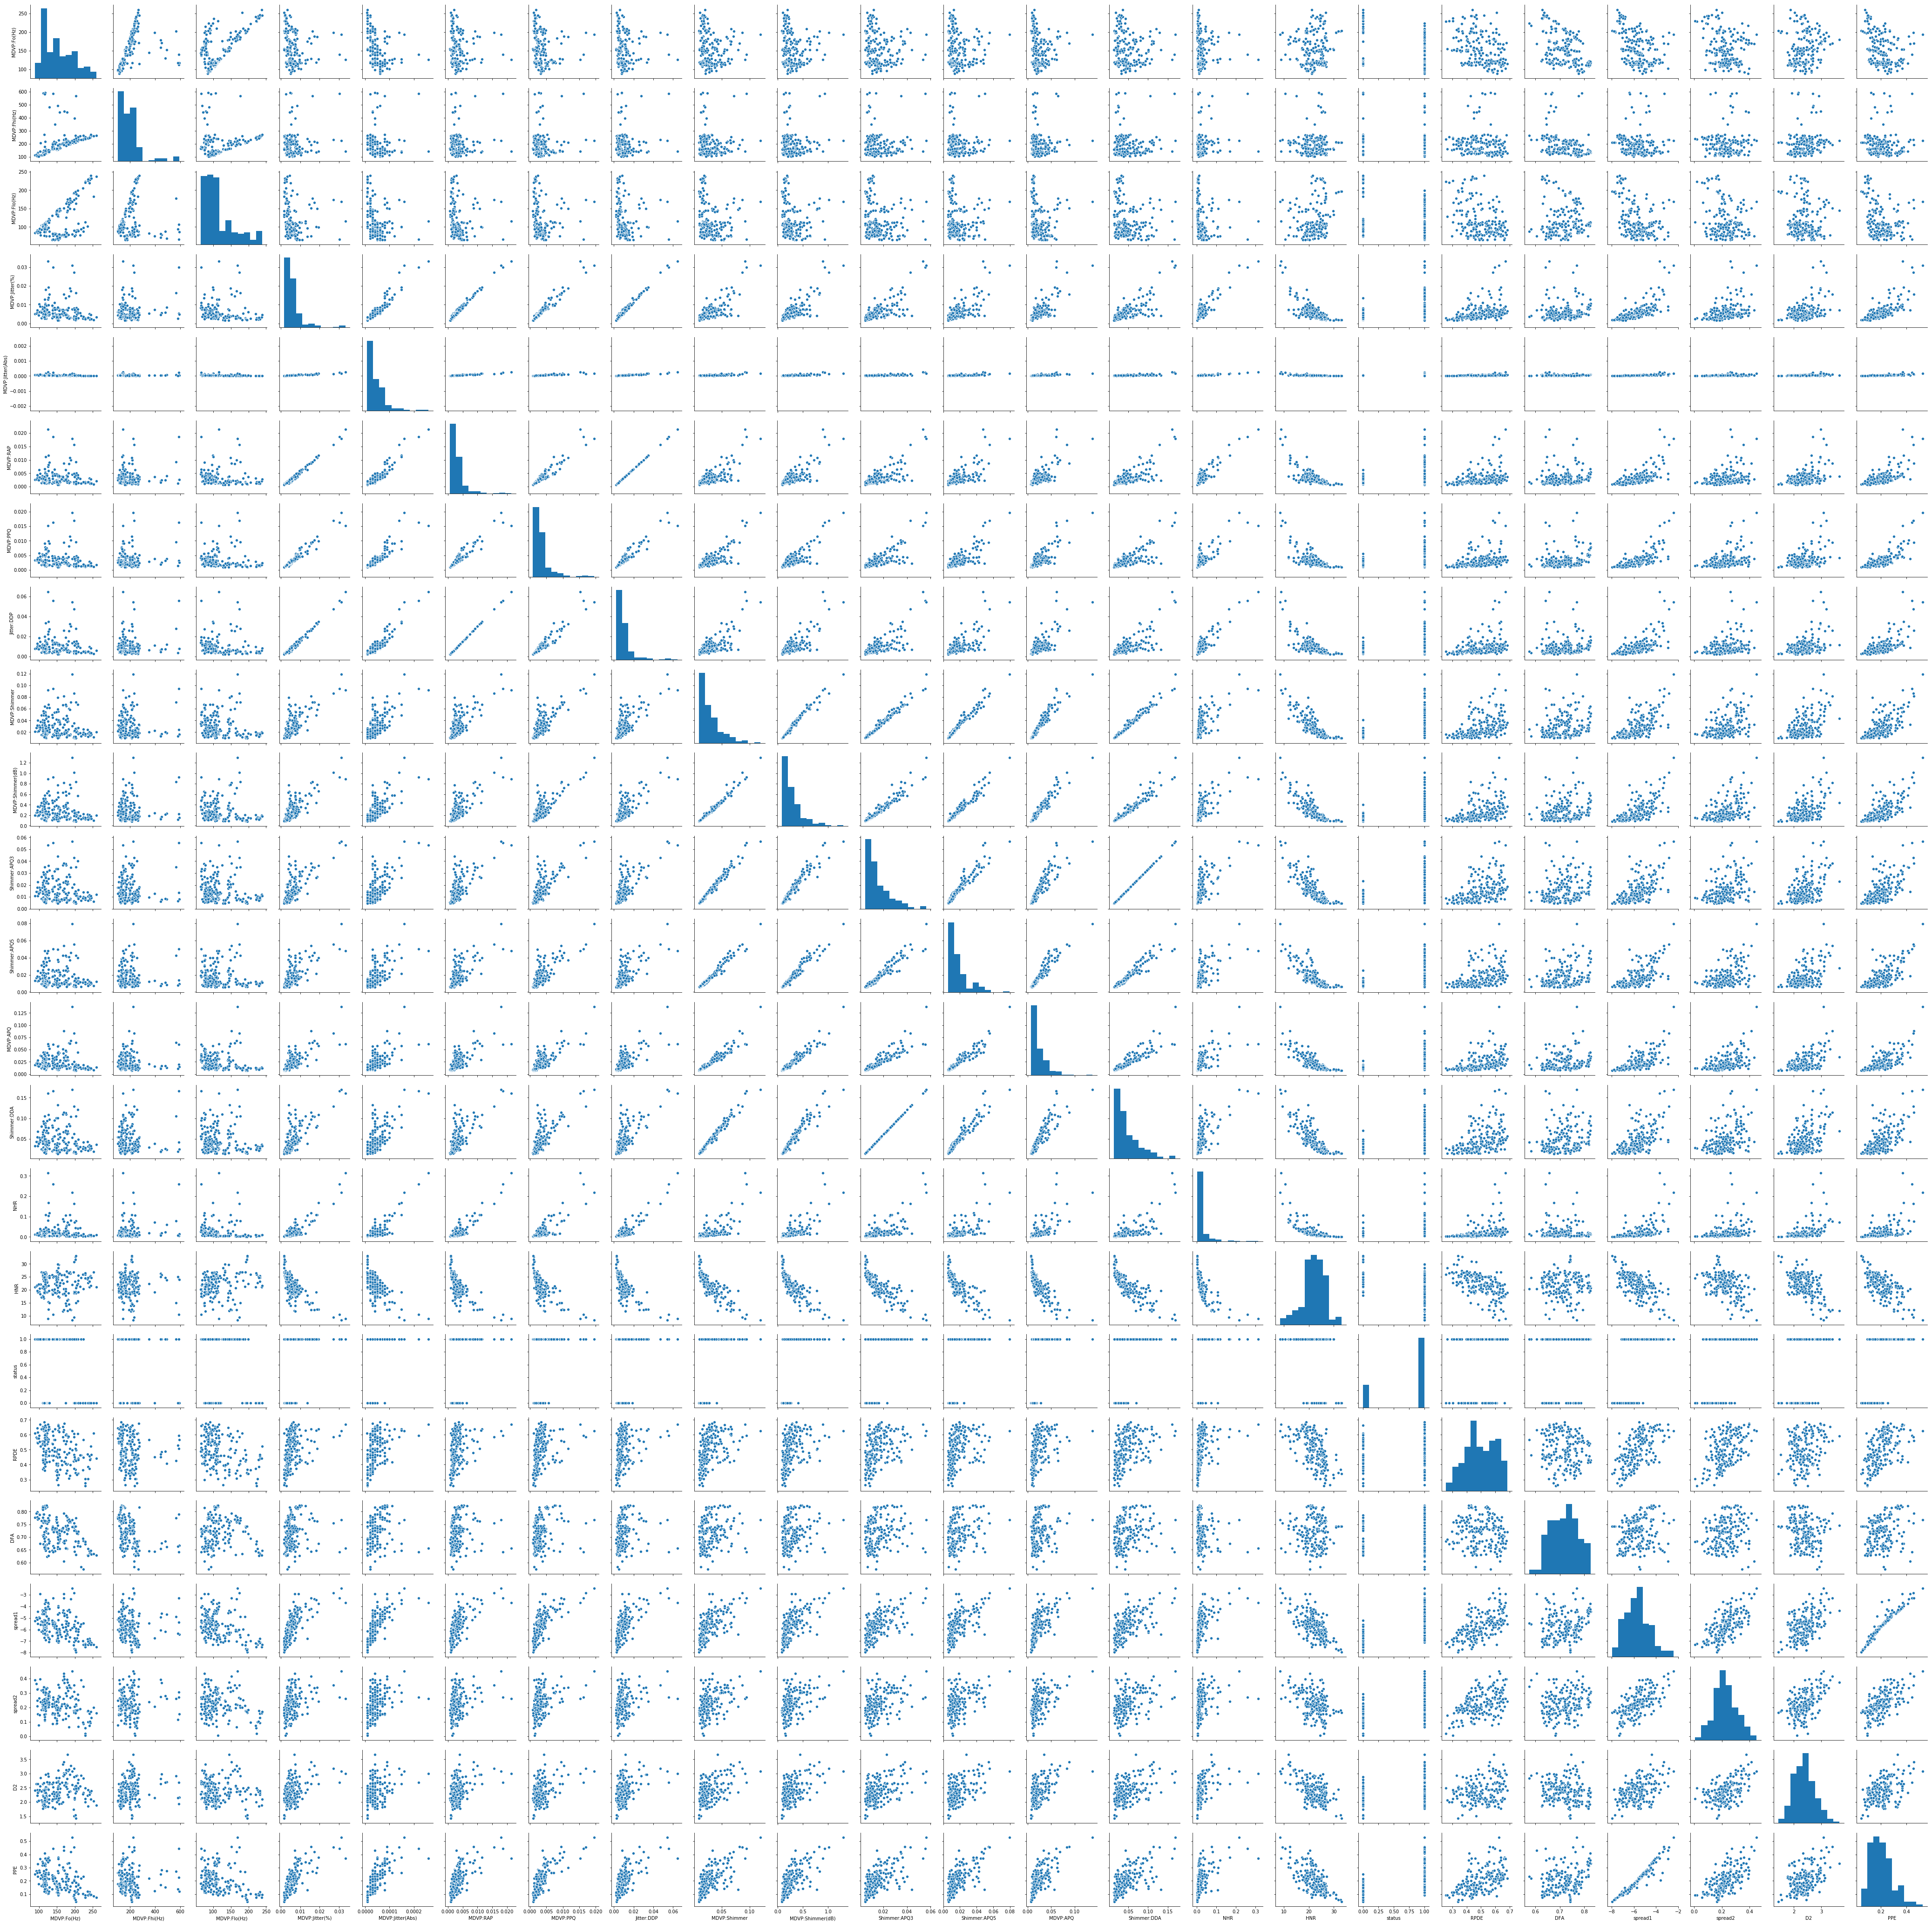

In [6]:
sns.pairplot(df)

Now we will start to look at what variables may create a clear separation between classes.  To do this we will create a box plot.  We will first standardize the data so that we can plot all of the features on the same scale. The hue or color of the box denotes whether the status was a 1 (the patient has Parkinson's) or 0 (the patient does not have Parkinson's).  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

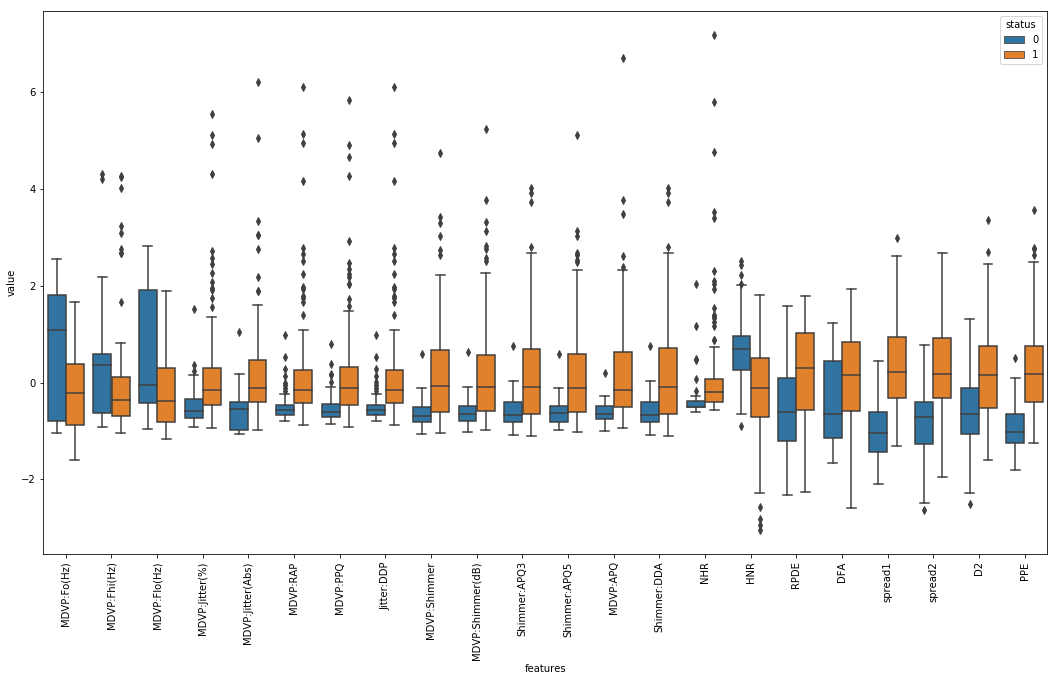

In [7]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) 
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1) 
data = pd.melt(data,id_vars="status",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

We can see from the boxplot that several of the features seem to have a pretty strong ability to separate out the different classes.  For example, MDVP:RAP, MDVP:PPQ, and Jitter:DDP have boxes that do not overlap (althought this is most likely not enough to build a model as some outliers do overlap between each feature.  Let's explore this further by building a pair grid for these three features.

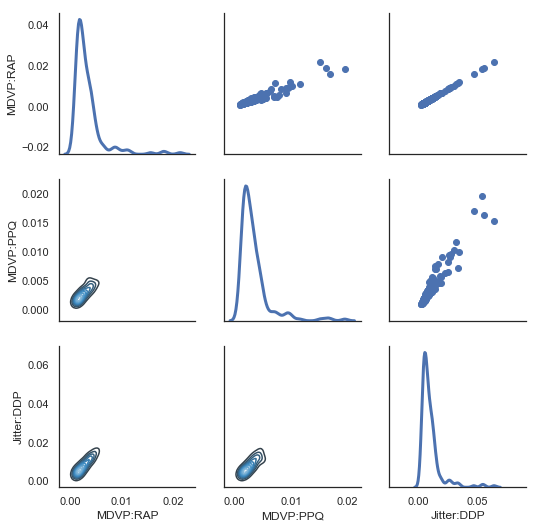

In [8]:
sns.set(style="white")
df = x.loc[:,['MDVP:RAP','MDVP:PPQ','Jitter:DDP']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

We can see that these three features are very correlated and we will keep this in mind when we move onto feature selection and dimensionality reduction.  The final plot we will look at for EDA will be a swarm plot which is another way to visualize the distributions of class members for each variable (in a similar way that the box plot did).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

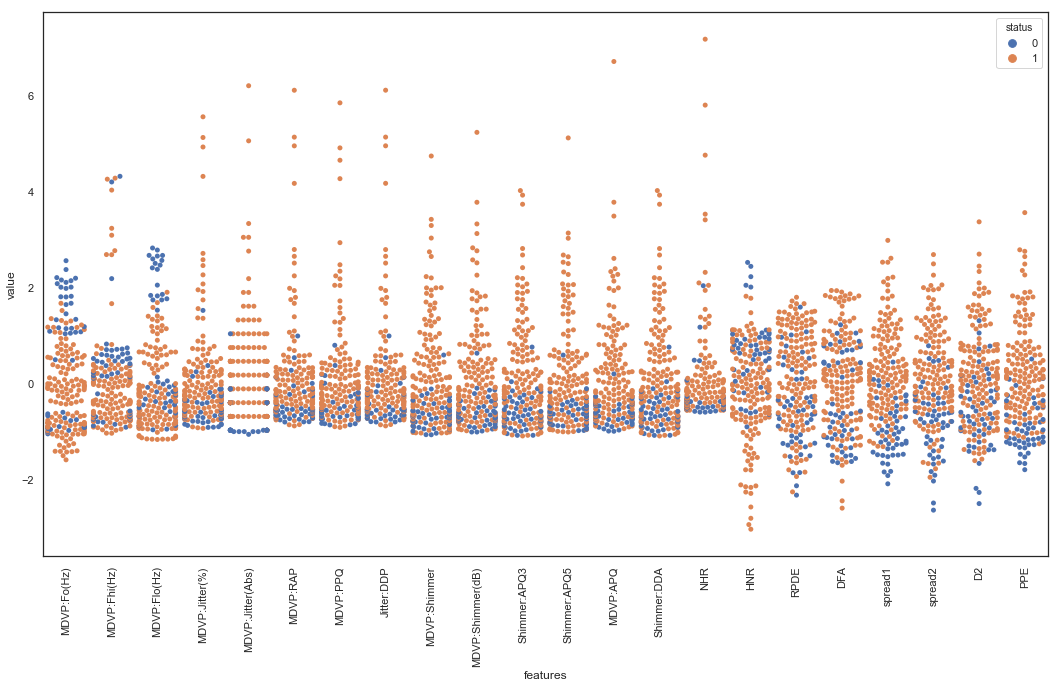

In [9]:
plt.figure(figsize=(18,10))
sns.swarmplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

We can see that no one feature clearly separates out the status class label.  Some predictors appear to do a better job than others to separate out the different classes.  We can check back after we do feature selection to see if it aligns with this visualization.  Now we will move onto PCA, TSNE, and UMAP.

Explained variation per principal component: [0.72899269 0.21824461 0.05112088 0.00159375]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 195 samples in 0.000s...
[t-SNE] Computed neighbors for 195 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 195 / 195
[t-SNE] Mean sigma: 11.610873
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.190151
[t-SNE] KL divergence after 300 iterations: 0.163206


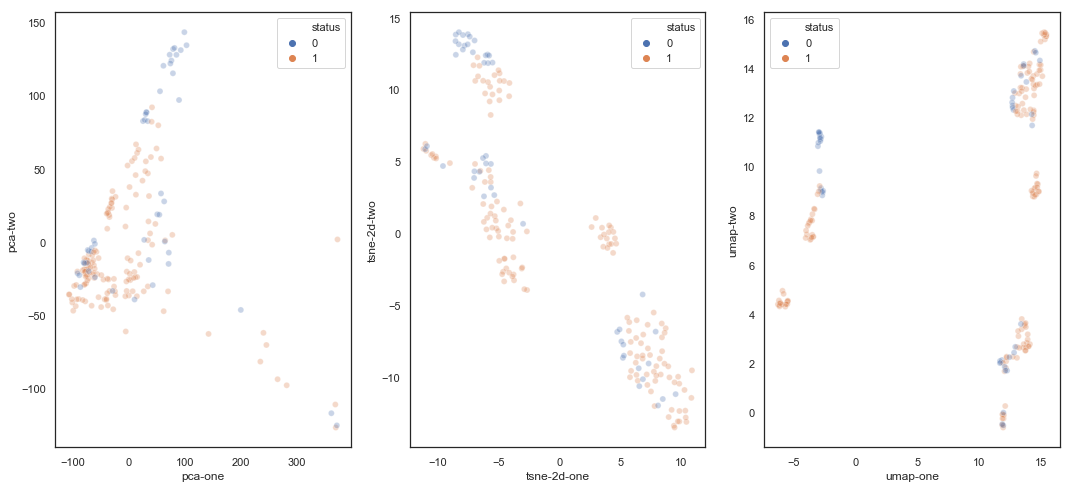

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
umap_results = umap.UMAP().fit_transform(x)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

We can see that from PCA, even with one principal component overe 70% of the variance can be explained. With two principal components, over 90% of the variance can be explained.  Comparing the plots, it looks like PCA did a comparable job to tSNE and UMAP.  However, none of these methods led to very clear separation of the two classes.  Now we will move onto feature selection.  We will build a baseline model (an MLP) that utilizes all of the features.  

In [11]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24), (96, 48)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05, 0.1], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('Best parameters found:\n', clf.best_params_)

0.699 (+/-0.075) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.747 (+/-0.141) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.740 (+/-0.110) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.760 (+/-0.077) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.801 (+/-0.058) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.829 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.808 (+/-0.124) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.815 (+/-0.028) for {'activatio

Now that we've performed a grid search to find the best parameters for our MLP, we can now use our test set to see how well the model generalized to our test set (this is a test to see how robust the model is).

In [13]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[ 6  5]
 [ 0 38]] 

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.88      1.00      0.94        38

   micro avg       0.90      0.90      0.90        49
   macro avg       0.94      0.77      0.82        49
weighted avg       0.91      0.90      0.89        49



We can see that this baseline model produced an accuracy of around 88%.  Now we will move onto several methods of feature selection.  There are two methods for feature selection: Filter methods and Wrapper methods.  Filter methods use a proxy measure instead of error rate to score a feature subset.  Wrapper methods use a predictive model to score feature subsets.  Below we will try two filter methods: mutual information and F-test.  

F-Test Feature Scores List: 
 [0.34505156 0.11001747 0.33086996 0.21545899 0.30044968 0.20520809
 0.23776225 0.20523899 0.37982835 0.34931601 0.33991581 0.3531176
 0.36115913 0.33986167 0.11610027 0.41951529 0.1757575  0.1575018
 1.         0.55983964 0.44670013 0.8774149 ]
Feature List: 
 Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object') 

Mutual Information Feature Scores List: 
 [0.93909107 0.59779665 0.69879616 0.29293192 0.71111516 0.43814142
 0.38983234 0.43957002 0.52027304 0.42559568 0.45086607 0.42952376
 0.50761512 0.4356832  0.54236942 0.53552779 0.12901353 0.39097299
 0.76224089 0.52199993 0.1373771  1.        ]
Feature List: 
 Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Ji

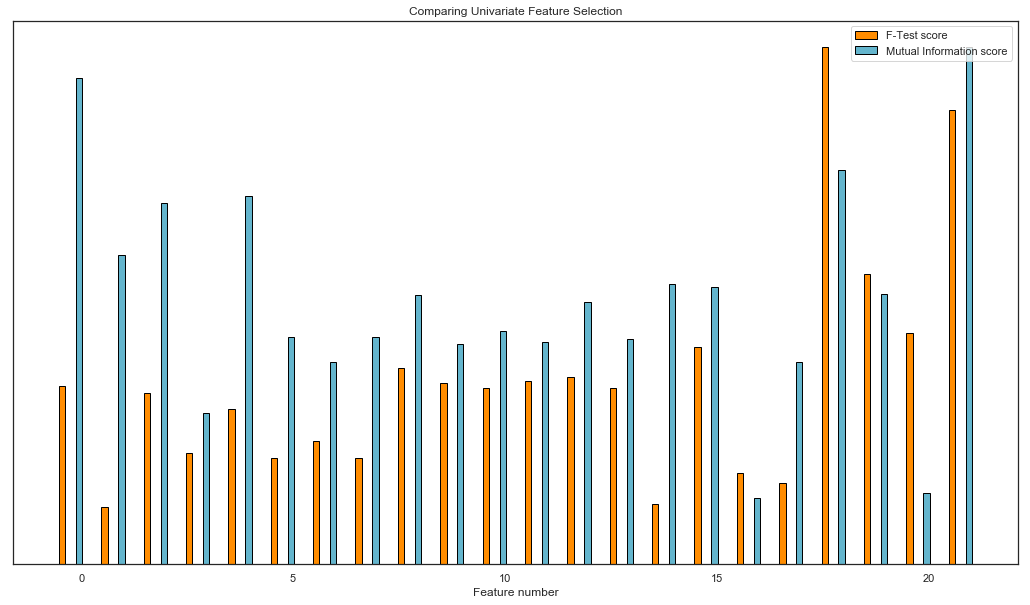

[[-6.51785952e-01  6.02805522e-01 -1.49882943e+00 -2.64733793e+00
  -6.89415623e-01 -1.27943335e+00]
 [-1.03193285e+00  1.47766929e+00 -1.31245885e+00 -9.82434794e-01
  -8.28537518e-01 -1.26111053e+00]
 [ 1.40408283e-01 -5.06291583e-01  1.70994339e-01  9.23849139e-02
  -7.30225830e-01  1.12210357e-01]
 [ 1.22863041e-01 -2.48603549e-03  5.23432182e-01  2.76273613e-01
  -9.53529579e-01  5.94777818e-01]
 [ 5.46607206e-01  3.36178215e-01 -8.42086796e-02  1.37824750e+00
  -9.79274948e-01 -1.40548772e-01]
 [-6.27328949e-01  8.59012390e-01 -8.74861677e-01 -2.00072403e-01
  -1.11012847e+00 -7.93317022e-01]
 [ 1.01448031e+00 -6.50818534e-01  1.20054278e+00  8.84183350e-01
   1.66771092e-01  5.88503340e-01]
 [-5.90111770e-01  8.30922512e-01 -1.24710348e+00 -1.91745678e+00
   2.06813914e-01 -1.16851748e+00]
 [-4.98663845e-01  7.12220126e-01 -9.23989476e-01  7.86661516e-01
   1.31026149e-01 -1.11871103e+00]
 [-2.78019142e-01  4.96562355e-01 -1.04072111e+00 -6.51992884e-01
  -3.84030506e-01 -9.6675

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
import numpy as np

plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(X_train, y_train)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(X_train, y_train)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(X_train, y_train)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(X_train, y_train)

We can see that each filtered garnered different results.  We will now build an MLP using each of the new feature sets that have the six features selected by each filter.  We can then compare the performances of these two new models to the original baseline model that used the entire original feature set.  

In [15]:
# Split data into training and testing
X_train, X_test, y_train_2, y_test = train_test_split(x_new_f, y_train, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train_2)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[ 5  5]
 [ 1 26]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.84      0.96      0.90        27

   micro avg       0.84      0.84      0.84        37
   macro avg       0.84      0.73      0.76        37
weighted avg       0.84      0.84      0.82        37



We can see that using the F-test filter actually yielded worse accuracy than the baseline model (nearly 84% instead of 88%).  This may because we only selected the 6 best features.  Now we will see how the a model built with the top 6 features from the mutual information filter compares.

In [16]:
# Split data into training and testing
X_train, X_test, y_train_3, y_test = train_test_split(x_new_mi, y_train, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train_3)

# Best parameter set
print('Best parameters found:\n', clf.best_params_, '\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'adaptive', 'solver': 'adam'} 

Confusion Matrix:
 [[ 3  7]
 [ 1 26]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.79      0.96      0.87        27

   micro avg       0.78      0.78      0.78        37
   macro avg       0.77      0.63      0.65        37
weighted avg       0.78      0.78      0.75        37



This model performed even worse than the model that used the features found from the F-test filter.  This model got around 78% accuracy.  Once again, I think this has to do with not knowing the optimal number of features to select.  We will now move onto a wrapper method for feature selection: Recursive Feature Elimination.  This will tell us both the most important features to build the best model but also the optiminal number of features to select. We will use a random forest classifier to do this.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier() 

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', x_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 14 

Best Features : Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object') 



We see that 14 features is the ideal number of features.  This confirms my previous assessment that the filter methods were not performing as well as the baseline model because we were not selecting enough features (e.g. 6) to build a robust model.  Below we will graph the cross validation score based on the number of features selected.  

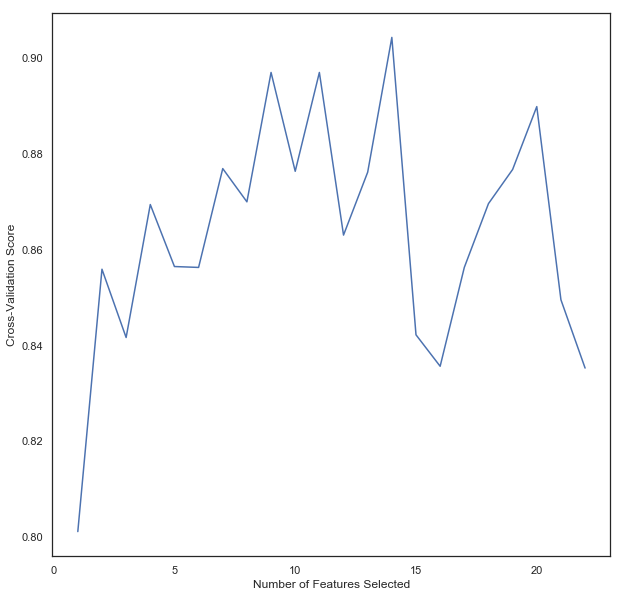

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We can see that the number of features selected heavily influences the performance of the model.  Finally, let's see how this model performs on the test set to see how robust it is.  

In [19]:
y_true, y_pred = y_test , rfecv.predict(x_test)

from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[ 8  3]
 [ 1 37]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.97      0.95        38

   micro avg       0.92      0.92      0.92        49
   macro avg       0.91      0.85      0.87        49
weighted avg       0.92      0.92      0.92        49



This model yielded the highest accuracy out of any of the models - it achieved around 92% accuracy on the test set.  This means that the model did not overfit and it generalized well to new data.  It is unsurprsing that this was the most well performing model as the RFECV not only told us what features to utilize - but also how many.